In [ ]:
# Install necessary libraries
!pip install dtaidistance
!pip install fastdtw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512549 sha256=29995e01f6e1905f9e75702bba4bfe227e91725fc4e9428141398dd1215de41b
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


Saving M1_M8_data.xlsx to M1_M8_data.xlsx
Left foot column max: 13.8232012011226
Right foot column max: 11.0472916441113
DTW Similarity Score: 0.99


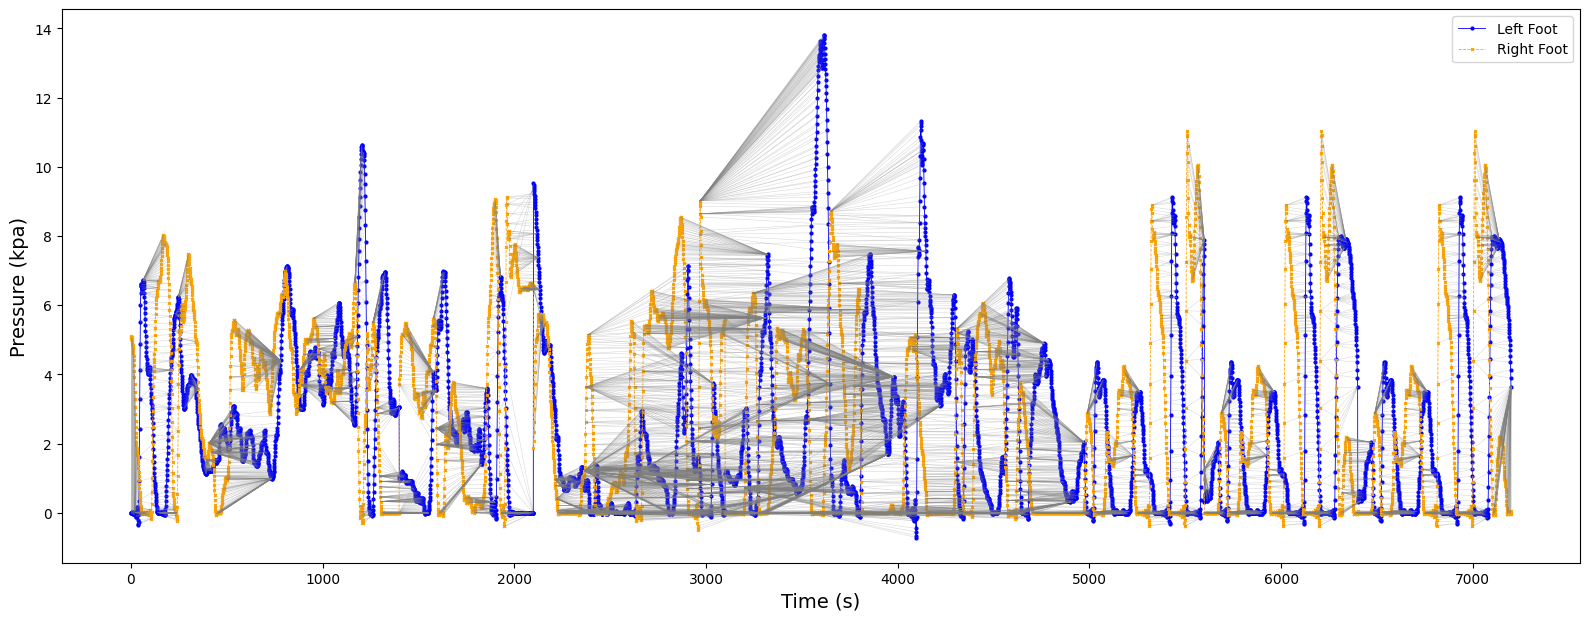

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dtaidistance import dtw
from google.colab import files

# Step 1: Upload data file
uploaded = files.upload()
df = pd.read_excel(next(iter(uploaded)), header=None)

# Step 2: Select specific columns for the left and right foot data per row
left_foot_column = df.iloc[:, 3]  # Column 14 (index 13) for Left Foot
right_foot_column = df.iloc[:, 19]  # Column 30 (index 29) for Right Foot

# Display maximum values to confirm data range
print("Left foot column max:", left_foot_column.max())
print("Right foot column max:", right_foot_column.max())

# Step 3: Compute the DTW distance and best path
distance, paths = dtw.warping_paths(left_foot_column, right_foot_column)
best_path = dtw.best_path(paths)

# Display similarity score
similarity_score = 1 - (distance / (len(left_foot_column) + len(right_foot_column)))
print(f"DTW Similarity Score: {similarity_score:.2f}")

# Step 4: Plotting with modified font size and figure dimensions
plt.figure(figsize=(16, 12))  # Increased figure dimension

# Plot the original time series
#plt.subplot(2, 2, 1)
#plt.plot(left_foot_column, label='Left Foot', color='blue', linewidth=0.8, marker='o', markersize=2)
#plt.plot(right_foot_column, label='Right Foot', linestyle='--', color='orange', linewidth=0.8, marker='x', markersize=2)
#plt.title('Original Time Series')
#plt.xlabel('Time (s)', fontsize=14)  # Increased font size
#plt.ylabel('Pressure', fontsize=14)  # Increased font size
#plt.legend()

# Plot the DTW best path
#plt.subplot(2, 2, 2)
#plt.plot(np.array(best_path)[:, 0], np.array(best_path)[:, 1], 'green', marker='o', linestyle='-', linewidth=0.6, markersize=3)
#plt.title('Shortest Path (Best Path)')
#plt.xlabel('Left Foot', fontsize=14)  # Increased font size
#plt.ylabel('Right Foot', fontsize=14)  # Increased font size
#plt.grid(True)

# Plot point-to-point comparison
plt.subplot(2, 1, 2)
plt.plot(left_foot_column, label='Left Foot', color='blue', linewidth=0.6, marker='o', markersize=2)
plt.plot(right_foot_column, label='Right Foot', color='orange', linestyle='--', linewidth=0.6, marker='x', markersize=2)
for a, b in best_path:
    plt.plot([a, b], [left_foot_column[a], right_foot_column[b]], color='grey', linestyle='-', linewidth=0.4, alpha=0.3)
#plt.title('Point-to-Point Comparison After DTW Alignment')
plt.xlabel('Time (s)', fontsize=14)  # Increased font size
plt.ylabel('Pressure (kpa)', fontsize=14)  # Increased font size
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
print("Left foot column max:", left_foot_column.max())
print("Right foot column max:", right_foot_column.max())
